Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("D:\\Intro to AI\\AIproject\\NLP\\UpdatedResumeDataSet.csv")
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [6]:
df.shape

(962, 2)

In [82]:
df['Category'].unique()

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])

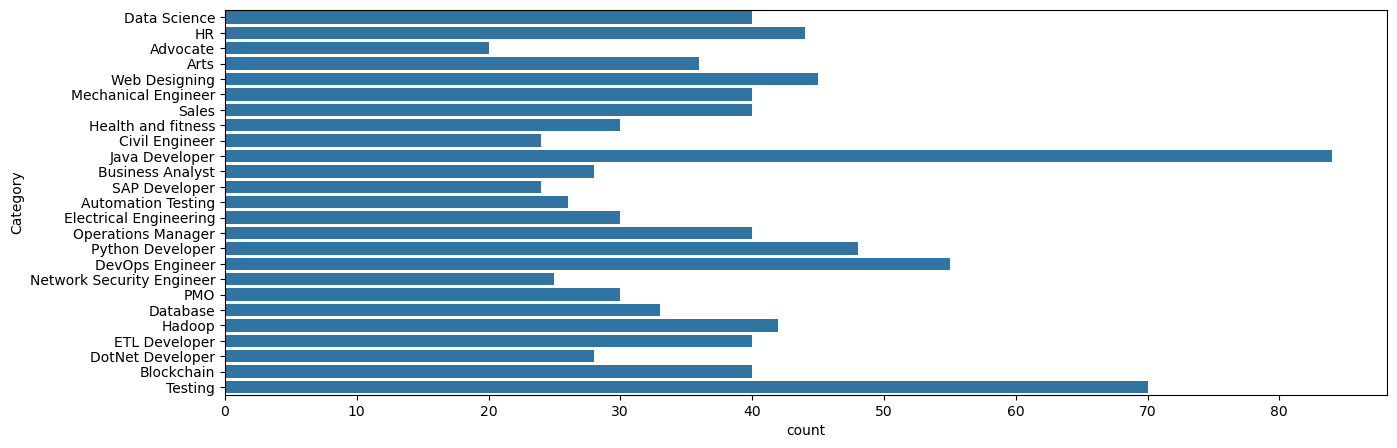

In [12]:
plt.figure(figsize=(15,5))
sns.countplot(df['Category'])
plt.show()

In [91]:
df['Resume']

0      Skills Programming Languages Python pandas num...
1      Education Details May 2013 to May 2017 BE UITR...
2      Areas of Interest Deep Learning Control System...
3      Skills R Python SAP HANA Tableau SAP HANA SQL ...
4      Education Details MCA YMCAUST Faridabad Haryan...
                             ...                        
957    Computer Skills Proficient in MS office Word B...
958    Willingness to aept the challenges Positive th...
959    PERSONAL SKILLS Quick learner Eagerness to lea...
960    COMPUTER SKILLS SOFTWARE KNOWLEDGE MSPower Poi...
961    Skill Set OS Windows XP788110 Database MYSQL s...
Name: Resume, Length: 962, dtype: object

([<matplotlib.patches.Wedge at 0x217e99ebe90>,
 [Text(1.058871228953308, 0.29797939609125923, '6'),
  Text(0.7841417468169058, 0.7714413269322118, '12'),
  Text(0.4134731563409379, 1.0193330903024107, '0'),
  Text(0.053862331076050214, 1.098680503736666, '1'),
  Text(-0.2771758554020645, 1.0645062447830609, '24'),
  Text(-0.5706079161115722, 0.9404289479119671, '16'),
  Text(-0.8089120262381768, 0.7454269473310228, '22'),
  Text(-0.9773196261993998, 0.5048230860860717, '14'),
  Text(-1.0745482070561094, 0.23525762625789806, '5'),
  Text(-1.0988505454600117, -0.05027403646252011, '15'),
  Text(-1.0485773173407904, -0.3323937567981556, '4'),
  Text(-0.9271404102234844, -0.5919549473825093, '21'),
  Text(-0.7427813690411197, -0.811341998053472, '2'),
  Text(-0.5207132389301881, -0.9689467079271352, '11'),
  Text(-0.291057286964679, -1.0607948226234707, '18'),
  Text(-0.06820918972358185, -1.0978831934396538, '20'),
  Text(0.1468428137867617, -1.090154662439778, '8'),
  Text(0.356275094949

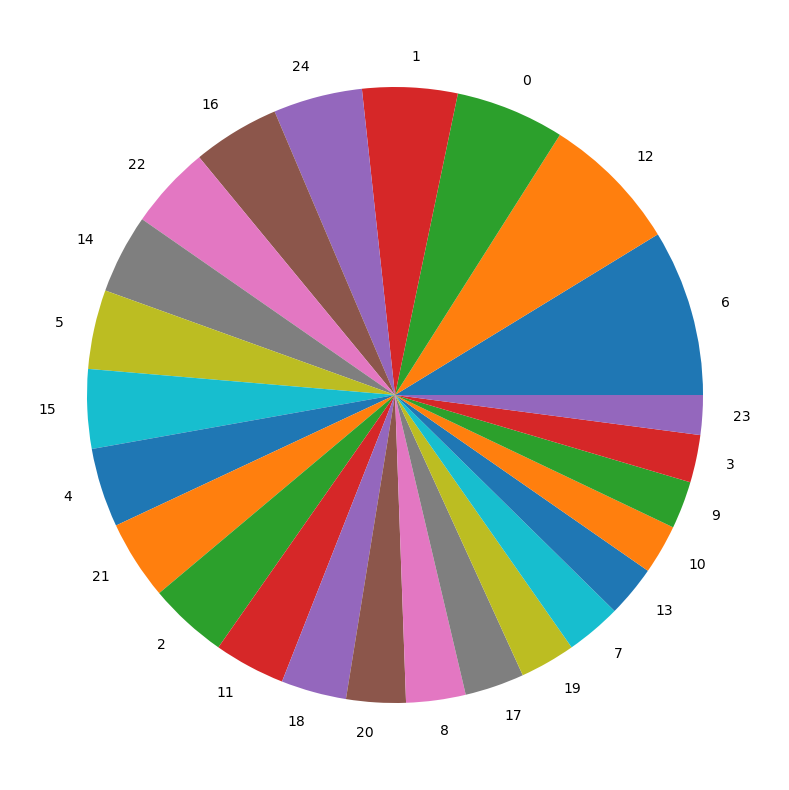

In [92]:
counts = df['Category'].value_counts()
labels = df['Category'].unique()
plt.figure(figsize=(15,10))
plt.pie(counts,labels = labels)

Cleaning Data

In [42]:
import re

def cleanResume(txt):
    cleanTxt = re.sub('http\S+\s','',txt)
    cleanTxt = re.sub('RT|cc','',cleanTxt)
    cleanTxt = re.sub('@\S+','',cleanTxt)
    cleanTxt = re.sub(r'\r\n', ' ', cleanTxt)
    cleanTxt = re.sub(r'[^\w\s]', '', cleanTxt)
    cleanTxt = re.sub(r'[^\x00-\x7F]+', '', cleanTxt)
    cleanTxt = re.sub(r'[^a-zA-Z0-9\s]', '', cleanTxt)
    cleanTxt = re.sub('#\S+','',cleanTxt)
    cleanTxt = re.sub(r'\s+', ' ', cleanTxt).strip() 
    return cleanTxt

<>:4: SyntaxWarning: invalid escape sequence '\S'
<>:6: SyntaxWarning: invalid escape sequence '\S'
<>:10: SyntaxWarning: invalid escape sequence '\S'
<>:4: SyntaxWarning: invalid escape sequence '\S'
<>:6: SyntaxWarning: invalid escape sequence '\S'
<>:10: SyntaxWarning: invalid escape sequence '\S'
C:\Users\HP Laptop\AppData\Local\Temp\ipykernel_19364\2791184756.py:4: SyntaxWarning: invalid escape sequence '\S'
  cleanTxt = re.sub('http\S+\s','',txt)
C:\Users\HP Laptop\AppData\Local\Temp\ipykernel_19364\2791184756.py:6: SyntaxWarning: invalid escape sequence '\S'
  cleanTxt = re.sub('@\S+','',cleanTxt)
C:\Users\HP Laptop\AppData\Local\Temp\ipykernel_19364\2791184756.py:10: SyntaxWarning: invalid escape sequence '\S'
  cleanTxt = re.sub('#\S+','',cleanTxt)


In [43]:
cleanResume("Hello ### ##Abdullah I am Abdullah # ? % And http://Abdullah is my !* ^ link and @gamil.com")

'Hello Abdullah I am Abdullah And is my link and'

In [44]:
df['Resume'] = df['Resume'].apply(lambda x: cleanResume(x))

In [50]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [51]:
le.fit(df['Category'])
df['Category'] = le.transform(df['Category'])

In [58]:
df


,Category,Resume
0,6,Skills Programming Languages Python pandas num...
1,6,Education Details May 2013 to May 2017 BE UITR...
2,6,Areas of Interest Deep Learning Control System...
3,6,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,6,Education Details MCA YMCAUST Faridabad Haryan...
...,...,...
957,23,Computer Skills Proficient in MS office Word B...
958,23,Willingness to aept the challenges Positive th...
959,23,PERSONAL SKILLS Quick learner Eagerness to lea...
960,23,COMPUTER SKILLS SOFTWARE KNOWLEDGE MSPower Poi...


    Vectorization

In [64]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words = 'english')
tfidf.fit(df['Resume'])

req_Txt = tfidf.transform(df['Resume'])

Spliting data for traning

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
X_train, X_test, y_train, y_test = train_test_split(req_Txt, df['Category'], test_size=0.2, random_state=42)

In [69]:
X_test.shape

(193, 7899)

In [70]:
X_train.shape

(769, 7899)

In [74]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score

clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train,y_train)
ypre = clf.predict(X_test)
print(accuracy_score(y_test,ypre))

0.9844559585492227


In [76]:
import pickle

pickle.dump(tfidf,open('tfidf.pkl','wb'))
pickle.dump(clf,open('clf.pkl','wb'))

Test Resume

In [93]:
myResume = """John Smith
123 Electric Ave, Spark City, TX 77001
Email: john.smith@example.com | Phone: +1 (555) 123-4567 | LinkedIn: linkedin.com/in/johnsmith

Professional Summary
Detail-oriented Electrical Engineer with over 5 years of experience in designing, testing, and maintaining electrical systems and components. Adept at problem-solving and project management with a strong focus on delivering cost-effective and reliable solutions.

Skills
Technical Expertise: Circuit Design, Power Systems, Control Systems, PLC Programming
Software & Tools: MATLAB, AutoCAD Electrical, ETAP, PSpice, SCADA
Programming Languages: Python, C++, VHDL
Certifications: Certified Electrical Safety Engineer, Lean Six Sigma Green Belt
Soft Skills: Team Leadership, Communication, Analytical Thinking
Education
Bachelor of Science in Electrical Engineering
University of Texas at Austin | Graduated: May 2018
GPA: 3.8/4.0

Relevant Coursework: Power System Analysis, Embedded Systems, Renewable Energy, Signal Processing

Work Experience
Electrical Engineer
Bright Sparks Engineering LLC – Houston, TX | Jun 2018 – Present

Designed and optimized electrical circuits for industrial automation systems, reducing energy consumption by 20%.
Led a team of 4 engineers to upgrade control systems for manufacturing plants, ensuring compliance with safety standards.
Conducted failure analysis and implemented preventive measures, reducing downtime by 15%.
Created technical documentation for electrical schematics and system operations.
Intern – Electrical Design
Voltage Innovations Inc. – Dallas, TX | Jan 2018 – May 2018

Assisted in the development of prototype power supply units for renewable energy systems.
Conducted load testing and analysis to validate system performance.
Supported the drafting of AutoCAD schematics for commercial projects.
Projects
Smart Energy Monitoring System

Designed a real-time energy monitoring system using IoT sensors and Python, enabling 25% cost savings for residential users.
Renewable Energy Grid Integration

Developed algorithms for efficient integration of solar and wind energy into existing power grids, increasing reliability and reducing energy losses.
Certifications
Professional Engineer (PE) License – State of Texas
Certified Energy Manager (CEM)
Languages
English: Native
Spanish: Conversational
Hobbies
Building DIY electronics projects, hiking, and photography.
"""

In [95]:
import pickle

clf = pickle.load(open('clf.pkl','rb'))

clean_resume = cleanResume(myResume)

input_feature = tfidf.transform([clean_resume])

pre_id = clf.predict(input_feature)[0]

category_mapping = {
  6: 'Data Science', 12: 'HR', 0: 'Advocate', 1: 'Arts', 
  24: 'Web Designing', 16: 'Mechanical Engineer', 
  22: 'Sales', 14: 'Health and fitness', 5: 'Civil Engineer', 
  15: 'Java Developer', 4: 'Business Analyst', 
  21: 'SAP Developer', 2: 'Automation Testing', 
  11: 'Electrical Engineering', 18: 'Operations Manager', 
  20: 'Python Developer', 8: 'DevOps Engineer', 
  17: 'Network Security Engineer', 19: 'PMO', 
  7: 'Database', 13: 'Hadoop', 10: 'ETL Developer', 
  9: 'DotNet Developer', 3: 'Blockchain', 23: 'Testing'
}


category_name = category_mapping.get(pre_id,"Unknown")
print("Predicted category : ",category_name)
print(pre_id)

Predicted category :  Electrical Engineering
11
